In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [40]:
data = pd.read_csv('insurance.csv')

In [41]:
df = pd.DataFrame(data)

In [42]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [43]:
df.isnull().sum().sum()

np.int64(0)

In [44]:
df.isnull().sum().sum()

np.int64(0)

In [45]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [46]:
df1 = df[['age', 'bmi', 'children']]

In [47]:
df1.head()

age     bmi  children
0   19  27.900         0
1   18  33.770         1
2   28  33.000         3
3   33  22.705         0
4   32  28.880         0

In [48]:
df2 = df['age'].head()

In [49]:
df2.head()

0    19
1    18
2    28
3    33
4    32
Name: age, dtype: int64

In [50]:
df.iloc[0:5]

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [51]:
    df = df[['age', 'bmi', 'children', 'charges']]

In [52]:
corr_matrix = df.corr()
print(corr_matrix)

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


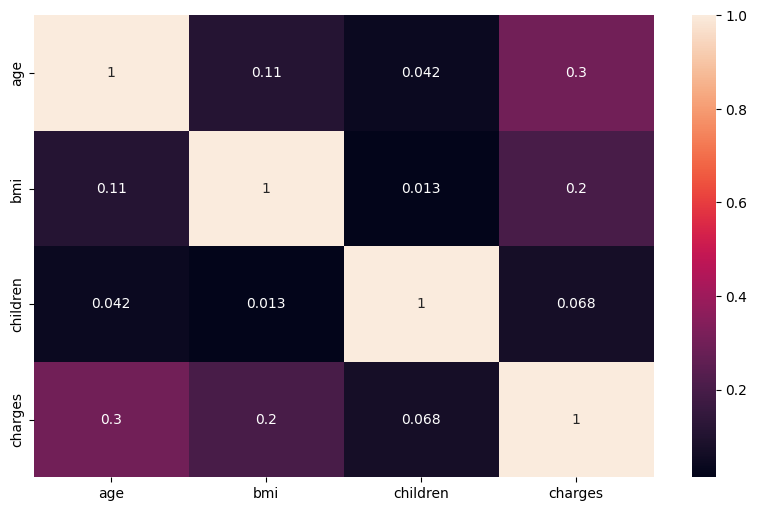

In [53]:
plt.figure(figsize=(10, 6))
sns.heatmap(data=corr_matrix, annot=True)
plt.show()

<Figure size 1000x600 with 0 Axes>

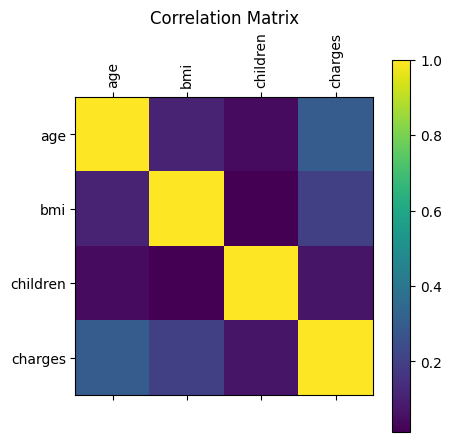

In [54]:
plt.figure(figsize=(10, 6))
plt.matshow(corr_matrix)
plt.colorbar()
plt.title('Correlation Matrix')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()

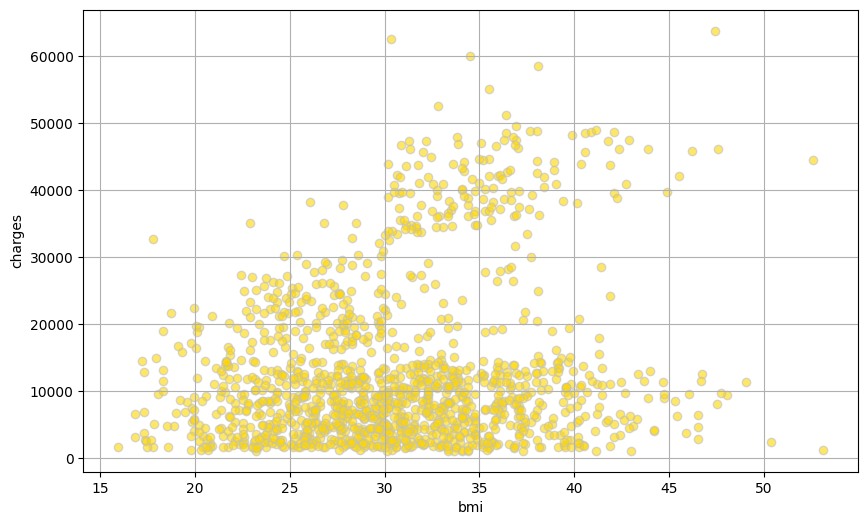

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(df['bmi'], df['charges'], alpha=0.6, color='gold', edgecolor='silver',)
plt.xlabel('bmi')
plt.ylabel('charges')
plt.grid(True)
plt.show()

In [56]:
X = df[['age', 'bmi', 'children']]
y = df['charges']

In [57]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[0.02173913 0.3212268  0.        ]
 [0.         0.47914985 0.2       ]
 [0.2173913  0.45843422 0.6       ]
 ...
 [0.         0.56201238 0.        ]
 [0.06521739 0.26472962 0.        ]
 [0.93478261 0.35270379 0.        ]]


In [58]:
# target variable meaning which is used for the predection
y = df['charges']

# now, split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [59]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [60]:
# make the predection
y_pred = model.predict(X_test)

In [61]:
# print the predections and the actual value for the comparison
print(f'Predection Value: {y_pred[:5]}')
print(f'Actual Value: {y_test.values[:5]}')

Predection Value: [13305.28945949 11801.95170145 16941.71437111 14278.42206855
  8680.25439362]
Actual Value: [ 9095.06825  5272.1758  29330.98315  9301.89355 33750.2918 ]


In [62]:
# calculate mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 131201335.64669803


In [63]:
rmse = mse ** 0.5
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 11454.315153980095


In [64]:
print(1+1)

2


In [65]:
import pickle

In [66]:
with open('trained_model.pkl','wb') as file:
    pickle.dump(model, file)

In [67]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [68]:
with open('trained_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)    

In [69]:
with open('scaler.pkl', 'rb') as file:
    loaded_scaler = pickle.load(file)

In [70]:
y_pred = loaded_model.predict(X_test)

print("Prediction using the loaded model:")
print(y_pred[:5])

Prediction using the loaded model:
[13305.28945949 11801.95170145 16941.71437111 14278.42206855
  8680.25439362]


In [71]:
custom_data = [10,27.900,7] 
# custom_data = np.array(custom_data).reshape(1,-1)
custom_data = pd.DataFrame([custom_data], columns=['age', 'bmi', 'children'])

In [72]:
custom_data_scaled = scaler.transform(custom_data)

In [73]:
y_pred_custom = loaded_model.predict(custom_data_scaled)
print("Custom Predection:")
print(y_pred_custom)

Custom Predection:
[9299.11657897]
